In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
from imgaug import augmenters as iaa
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import ntpath
import pandas as pd
import random

In [2]:
data_dir = "abpod2"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(data_dir, "driving_log.csv"), names=columns)
pd.set_option("display.max_colwidth", -1)
data.head(10)

C:\Users\EFE\AppData\Local\Temp/ipykernel_22676/1804838264.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


center  \
0  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_28_875.jpg   
1  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_28_942.jpg   
2  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_011.jpg   
3  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_087.jpg   
4  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_161.jpg   
5  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_232.jpg   
6  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_299.jpg   
7  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_370.jpg   
8  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_438.jpg   
9  C:\Users\EFE\Documents\abpod2\IMG\center_2023_06_11_23_30_29_505.jpg   

                                                                 left  \
0  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_28_875.jpg   
1  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_28_942.jpg   
2  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_011.jpg   
3  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_087.jpg   
4  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_161.jpg   
5  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_232.jpg   
6  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_299.jpg   
7  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_370.jpg   
8  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_438.jpg   
9  C:\Users\EFE\Documents\abpod2\IMG\left_2023_06_11_23_30_29_505.jpg   

                                                                 right  \
0  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_28_875.jpg   
1  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_28_942.jpg   
2  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_011.jpg   
3  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_087.jpg   
4  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_161.jpg   
5  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_232.jpg   
6  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_299.jpg   
7  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_370.jpg   
8  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_438.jpg   
9  C:\Users\EFE\Documents\abpod2\IMG\right_2023_06_11_23_30_29_505.jpg   

   steering  throttle  reverse     speed  
0  0.00      0.000000  0.0      0.000011  
1  0.00      0.000000  0.0      0.000008  
2  0.00      0.000000  0.0      0.000002  
3  0.00      0.065684  0.0      0.054943  
4  0.00      0.320138  0.0      0.188639  
5 -0.10      0.556346  0.0      0.664379  
6 -0.25      0.734636  0.0      1.123770  
7 -0.45      0.970327  0.0      1.999983  
8  0.00      1.000000  0.0      2.689788  
9  0.00      1.000000  0.0      3.392640

In [3]:
def path_leaf(path : str):
    head, tail = ntpath.split(path)
    return tail

In [4]:
data["center"] = data["center"].apply(path_leaf)
data["left"] = data["left"].apply(path_leaf)
data["right"] = data["right"].apply(path_leaf)

In [5]:
data.head(15)

center                              left  \
0   center_2023_06_11_23_30_28_875.jpg  left_2023_06_11_23_30_28_875.jpg   
1   center_2023_06_11_23_30_28_942.jpg  left_2023_06_11_23_30_28_942.jpg   
2   center_2023_06_11_23_30_29_011.jpg  left_2023_06_11_23_30_29_011.jpg   
3   center_2023_06_11_23_30_29_087.jpg  left_2023_06_11_23_30_29_087.jpg   
4   center_2023_06_11_23_30_29_161.jpg  left_2023_06_11_23_30_29_161.jpg   
5   center_2023_06_11_23_30_29_232.jpg  left_2023_06_11_23_30_29_232.jpg   
6   center_2023_06_11_23_30_29_299.jpg  left_2023_06_11_23_30_29_299.jpg   
7   center_2023_06_11_23_30_29_370.jpg  left_2023_06_11_23_30_29_370.jpg   
8   center_2023_06_11_23_30_29_438.jpg  left_2023_06_11_23_30_29_438.jpg   
9   center_2023_06_11_23_30_29_505.jpg  left_2023_06_11_23_30_29_505.jpg   
10  center_2023_06_11_23_30_29_575.jpg  left_2023_06_11_23_30_29_575.jpg   
11  center_2023_06_11_23_30_29_643.jpg  left_2023_06_11_23_30_29_643.jpg   
12  center_2023_06_11_23_30_29_715.jpg  left_2023_06_11_23_30_29_715.jpg   
13  center_2023_06_11_23_30_29_787.jpg  left_2023_06_11_23_30_29_787.jpg   
14  center_2023_06_11_23_30_29_858.jpg  left_2023_06_11_23_30_29_858.jpg   

                                right  steering  throttle  reverse     speed  
0   right_2023_06_11_23_30_28_875.jpg  0.00      0.000000  0.0      0.000011  
1   right_2023_06_11_23_30_28_942.jpg  0.00      0.000000  0.0      0.000008  
2   right_2023_06_11_23_30_29_011.jpg  0.00      0.000000  0.0      0.000002  
3   right_2023_06_11_23_30_29_087.jpg  0.00      0.065684  0.0      0.054943  
4   right_2023_06_11_23_30_29_161.jpg  0.00      0.320138  0.0      0.188639  
5   right_2023_06_11_23_30_29_232.jpg -0.10      0.556346  0.0      0.664379  
6   right_2023_06_11_23_30_29_299.jpg -0.25      0.734636  0.0      1.123770  
7   right_2023_06_11_23_30_29_370.jpg -0.45      0.970327  0.0      1.999983  
8   right_2023_06_11_23_30_29_438.jpg  0.00      1.000000  0.0      2.689788  
9   right_2023_06_11_23_30_29_505.jpg  0.00      1.000000  0.0      3.392640  
10  right_2023_06_11_23_30_29_575.jpg  0.00      1.000000  0.0      4.333474  
11  right_2023_06_11_23_30_29_643.jpg  0.00      1.000000  0.0      5.032243  
12  right_2023_06_11_23_30_29_715.jpg -0.15      1.000000  0.0      5.953657  
13  right_2023_06_11_23_30_29_787.jpg -0.30      1.000000  0.0      6.628976  
14  right_2023_06_11_23_30_29_858.jpg -0.50      1.000000  0.0      7.505190

In [7]:
def plot_hist(smpls_per_bin:int):
    center = (bins[:-1] + bins[1:]) * 0.5
    plt.bar(center, hist, width=0.05)
    plt.plot((np.min(data["steering"]), np.max(data["steering"])), (smpls_per_bin, smpls_per_bin))

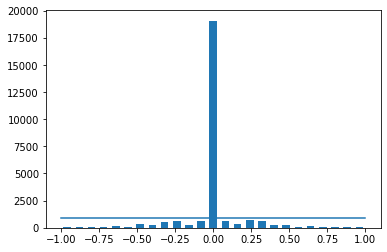

In [8]:
num_of_bins = 25
samples_per_bin = 900
hist, bins = np.histogram(data["steering"], num_of_bins)
plot_hist(samples_per_bin)

total data:	 25526
removed:	 18163
remaining data:	 7363


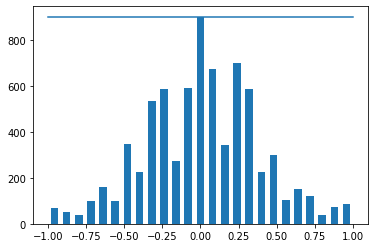

In [9]:
print("total data:\t", len(data))
remove_list = []
for j in range(num_of_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if bins[j] <= data["steering"][i] <= bins[j + 1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print("removed:\t", len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print("remaining data:\t", len(data))

hist, _ = np.histogram(data["steering"], num_of_bins)
plot_hist(samples_per_bin)

In [10]:
def load_img_steering(data_directory, dataframe):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(data_directory, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [11]:
print(data.iloc[1])

center      center_2023_06_11_23_30_29_299.jpg
left        left_2023_06_11_23_30_29_299.jpg  
right       right_2023_06_11_23_30_29_299.jpg 
steering   -0.25                              
throttle    0.734636                          
reverse     0.0                               
speed       1.12377                           
Name: 6, dtype: object


In [12]:
img_paths, steerings = load_img_steering(data_dir + "/IMG", data)
x_train, x_validation, y_train, y_validation = train_test_split(img_paths, steerings, test_size=0.3, random_state=7)
print(f"Training Samples:{len(x_train)}\nValidation Samples:{len(x_validation)}")

Training Samples:5154
Validation Samples:2209


Text(0.5, 1.0, 'Validation set')

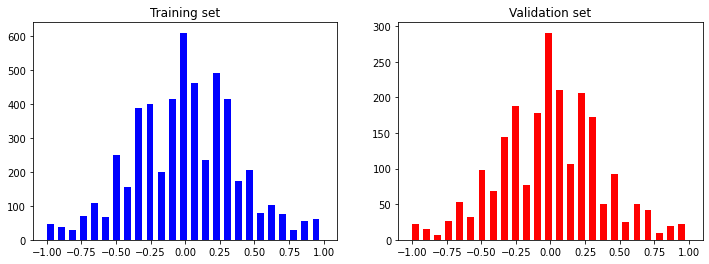

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_of_bins, width=0.05, color="blue")
axes[0].set_title("Training set")
axes[1].hist(y_validation, bins=num_of_bins, width=0.05, color="red")
axes[1].set_title("Validation set")

In [14]:
def zoom(image):
    zoom_ = iaa.Affine((1, 1.3))
    return zoom_.augment_image(image)

In [15]:
def pan(image):
    pan_ = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    return pan_.augment_image(image)

In [16]:
def img_random_brightness(image):
    brightness_ = iaa.Multiply((0.2, 1.2))
    return brightness_.augment_image(image)

In [17]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

In [18]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # Best for the NVIDIA model
    img = cv2.GaussianBlur(img, (3, 3), 0) # Smoothen out Image
    img = cv2.resize(img, (200, 66)) # Fit the size of the NVIDIA model input
    img = img/255
    return img

(-0.5, 319.5, 159.5, -0.5)

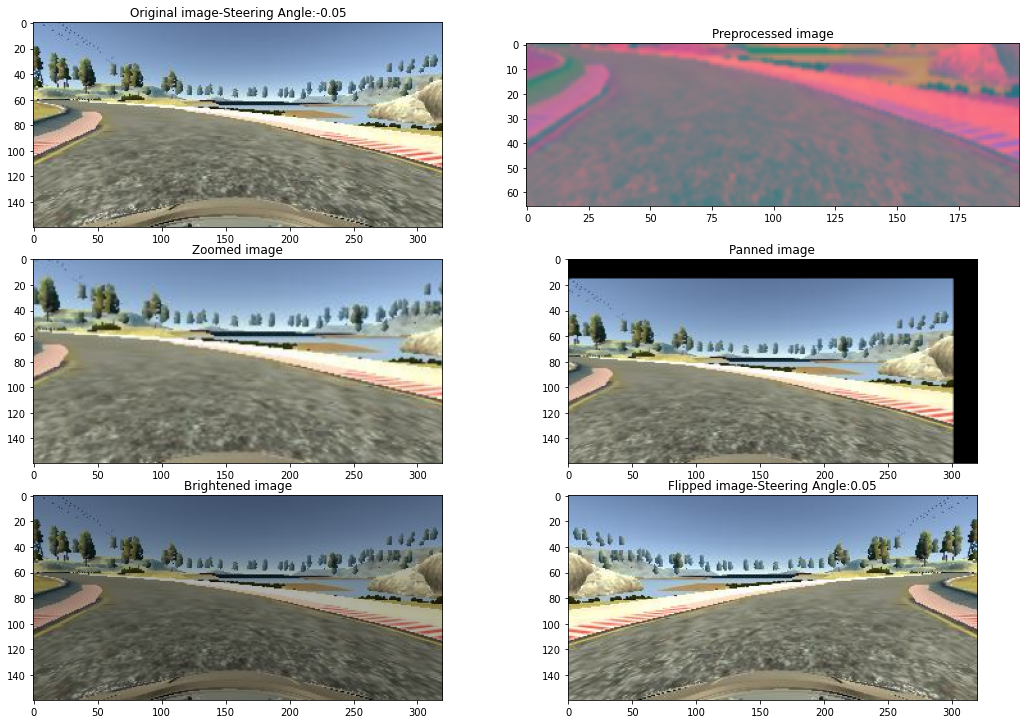

In [19]:
random_index = random.randint(0, len(x_train) - 1)
image_path = img_paths[random_index]
steering_ang = steerings[random_index]

original_img = mpimg.imread(image_path)
preprocessed_img = img_preprocess(original_img)
zoomed_img = zoom(original_img)
panned_img = pan(original_img)
bright_img = img_random_brightness(original_img)
flipped_img, flipped_steering_angle = img_random_flip(original_img, steering_ang)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.tight_layout()

axes[0][0].imshow(original_img)
axes[0][0].set_title(f"Original image-Steering Angle:{str(steering_ang)}")
axes[0][0].axis("on")

axes[0][1].imshow(preprocessed_img)
axes[0][1].set_title("Preprocessed image")
axes[0][1].axis("on")

axes[1][0].imshow(zoomed_img)
axes[1][0].set_title("Zoomed image")
axes[1][0].axis("on")

axes[1][1].imshow(panned_img)
axes[1][1].set_title("Panned image")
axes[1][1].axis("on")

axes[2][0].imshow(bright_img)
axes[2][0].set_title("Brightened image")
axes[2][0].axis("on")

axes[2][1].imshow(flipped_img)
axes[2][1].set_title(f"Flipped image-Steering Angle:{str(flipped_steering_angle)}")
axes[2][1].axis("on")

In [20]:
def random_augment(image_path, steering_angle):
    image = mpimg.imread(image_path)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

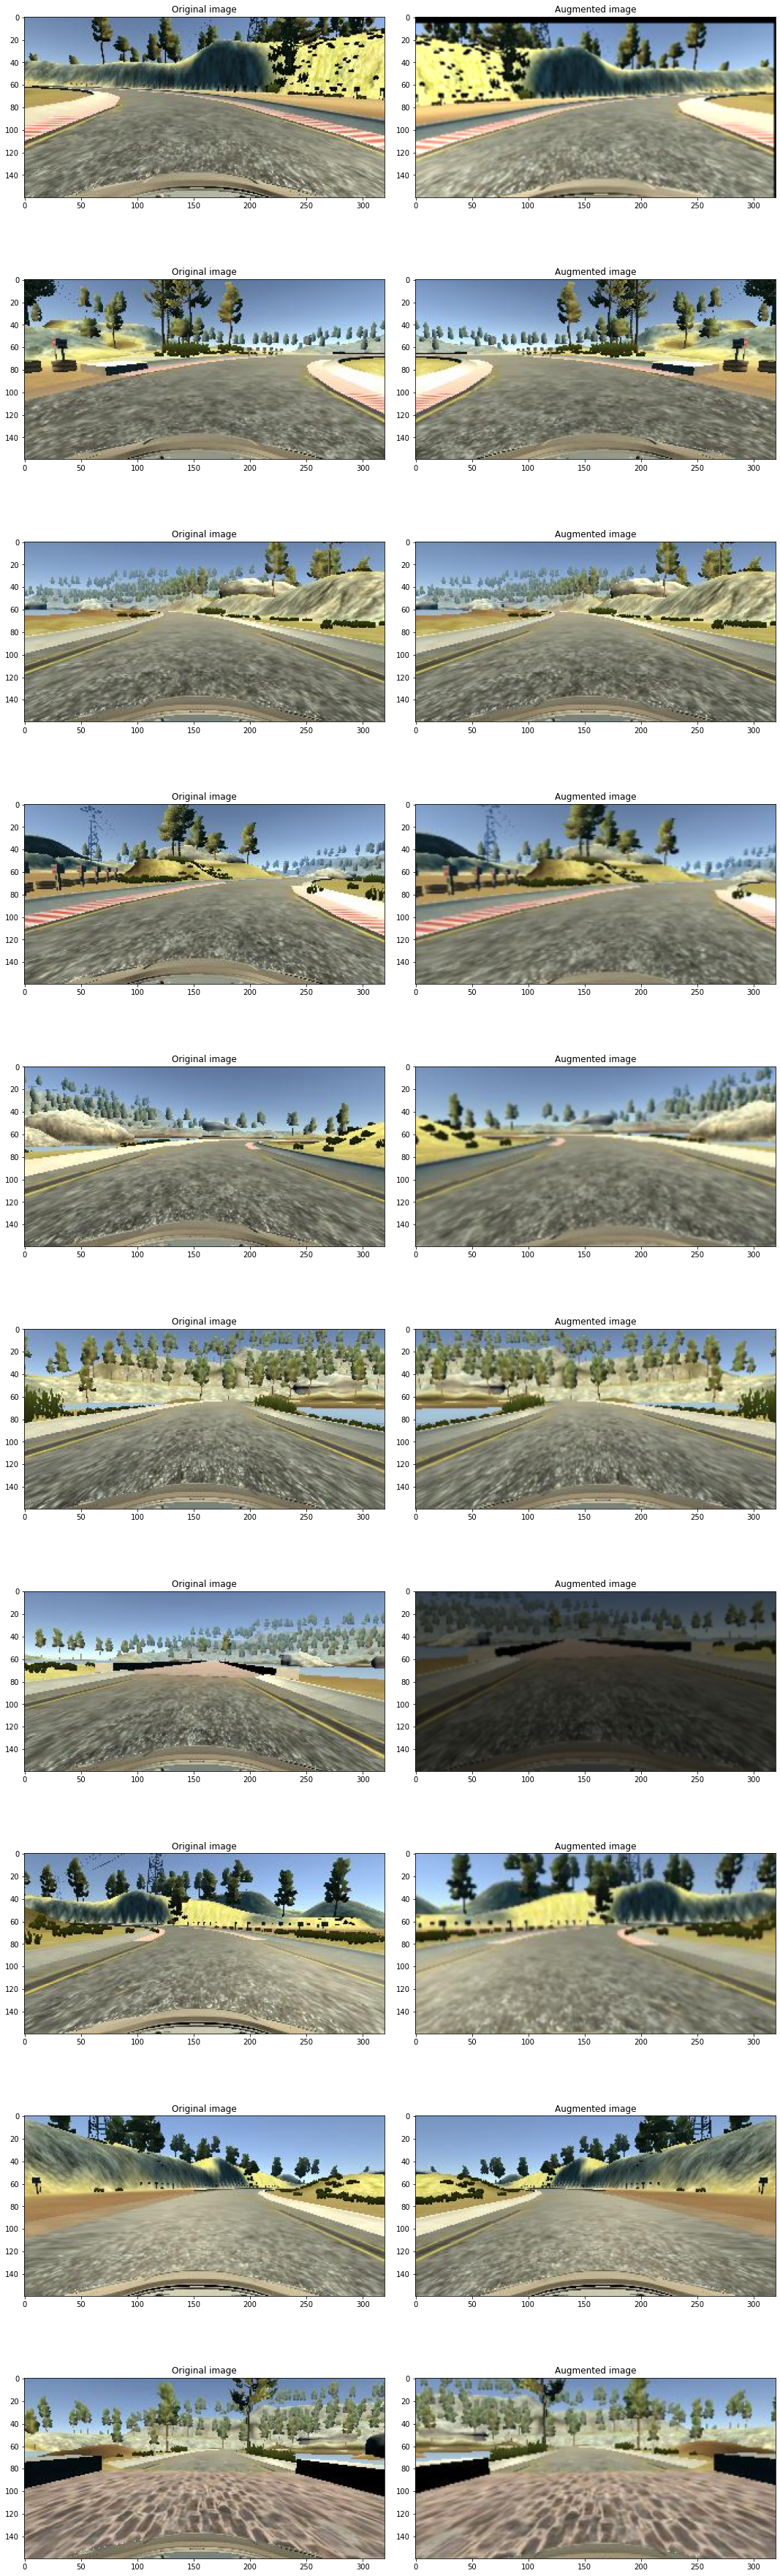

In [21]:
no_rows = 10
no_cols = 2

fig, axes = plt.subplots(no_rows, no_cols, figsize=(15, 50))
fig.tight_layout()

for i in range(no_rows):
    random_index = random.randint(0, len(x_train) - 1)
    random_img_path = img_paths[random_index]
    random_steering_ang = steerings[random_index]

    original_img = mpimg.imread(random_img_path)
    augmented_img, steering = random_augment(random_img_path, random_steering_ang)

    axes[i][0].imshow(original_img)
    axes[i][0].set_title("Original image")
    axes[i][0].axis("on")

    axes[i][1].imshow(augmented_img)
    axes[i][1].set_title("Augmented image")
    axes[i][1].axis("on")

In [22]:
def batch_generator(image_paths, steering_angles, batch_size, is_training : bool):
    while True:
        batch_img = []
        batch_steering = []

        for batch in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if is_training:
                img, steering = random_augment(image_paths[random_index], steering_angles[random_index])
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_angles[random_index]

            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)
        yield np.asarray(batch_img), np.asarray(batch_steering)

In [23]:
# x_train_gen, y_train_gen = next(batch_generator(x_train, y_train, 1, True))
# x_val_gen, y_val_gen = next(batch_generator(x_validation, y_validation, 1, False))

In [24]:
# x_train = np.array(list(map(img_preprocess, x_train)))
# x_validation = np.array(list(map(img_preprocess, x_validation)))

In [25]:
# plt.imshow(x_train[random.randint(0, len(x_train) - 1)])
# plt.axis("off")
# print(x_train.shape)

In [26]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation="elu"))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation="elu"))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation="elu"))
    model.add(Conv2D(64, (3, 3), activation="elu"))
    model.add(Conv2D(64, (3, 3), activation="elu"))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(100, activation="relu"))
    # model.add(Dropout(0.25))

    model.add(Dense(50, activation="relu"))
    # model.add(Dropout(0.25))

    model.add(Dense(10, activation="relu"))
    # model.add(Dropout(0.25))

    model.add(Dense(1))

    model.compile(loss="mse", optimizer=Adam(learning_rate=1e-3))
    return model

In [27]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [28]:
from keras.callbacks import CSVLogger
from time import time

csv_logger = CSVLogger(f'logs/training-{round(time(), 2)}.log', separator=',', append=False)

In [ ]:
history = model.fit(
    batch_generator(x_train, y_train, batch_size=100, is_training=True),
    steps_per_epoch=300,
    epochs=10,
    validation_data=batch_generator(x_validation, y_validation, 100, False),
    validation_steps=200,
    callbacks=[csv_logger],
    verbose=1,
    shuffle=1)

Epoch 1/10
300/300 [==============================] - 371s 1s/step - loss: 0.1375 - val_loss: 0.0998
Epoch 2/10
 59/300 [====>.........................] - ETA: 2:31 - loss: 0.1201

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training", "validation"])
plt.title("Loss")
plt.xlabel("Epoch")

In [ ]:
model.save("nvidia_model_(optimized_v5).h5")

In [ ]:
import pandas as pd
log_data = pd.read_csv('logs/training-1686915528.48.log', sep=',', engine='python')

In [ ]:
log_data.head()

In [ ]:
plt.plot(log_data.loss)
plt.plot(log_data.val_loss)
plt.legend(["training", "validation"])
plt.title("Loss")
plt.xlabel("Epoch")